# 1. Import Library

In [20]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [21]:
!pip install torch

# 2. Load dataset using pandas

## About dataset: Heart Disease Dataset

*   age
*   sex
*   chest pain type (4 values)
*   resting blood pressure
*   serum cholestoral in mg/dl
*   fasting blood sugar > 120 mg/dl
*   resting electrocardiographic results (values 0,1,2)
*   maximum heart rate achieved
*   exercise induced angina
*   oldpeak = ST depression induced by exercise relative to rest
*   the slope of the peak exercise ST segment
*   number of major vessels (0-3) colored by flourosopy
*   thal: 0 = normal; 1 = fixed defect; 2 = reversable defect


















In [22]:
df = pd.read_csv('heart.csv')
df.tail(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1010,51,1,0,140,299,0,1,173,1,1.6,2,0,3,0
1011,45,1,1,128,308,0,0,170,0,0.0,2,0,2,1
1012,48,1,1,110,229,0,1,168,0,1.0,0,0,3,0
1013,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
1014,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
1015,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0
1016,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0
1017,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
1018,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1


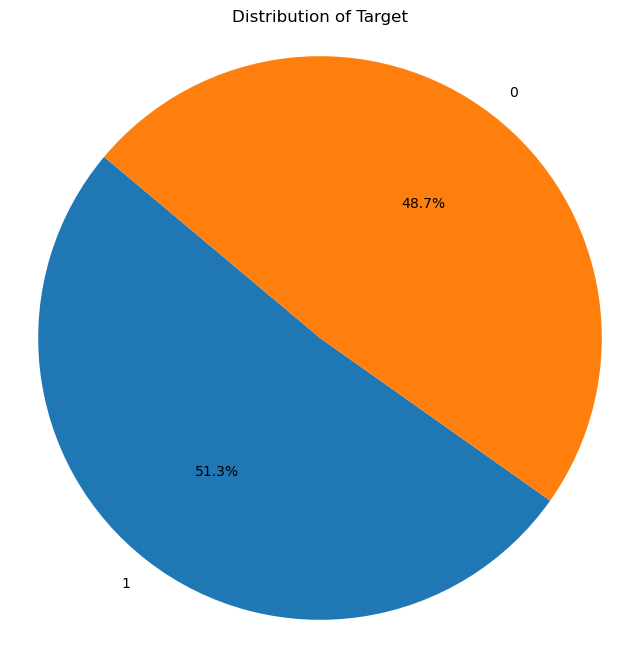

In [23]:
target_counts = df['target'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Target')
plt.axis('equal')
plt.show()


#3. Processing data

In [24]:
# convert data to numpy array
X = df.iloc[:, 0:-1].values
y = list(df.iloc[:, -1])

In [25]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [26]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).unsqueeze(1)

In [31]:
print(X_test_tensor[:5])

tensor([[ 0.8344, -1.5117, -0.9158, -0.4348, -0.7175, -0.4189,  0.8913,  0.6039,
         -0.7123, -0.9123,  0.9954, -0.7320, -0.5221],
        [-0.1582, -1.5117,  1.0276, -0.2063, -0.5818, -0.4189, -1.0040, -1.4836,
         -0.7123, -0.9123,  0.9954, -0.7320, -3.7461],
        [ 0.0624,  0.6615, -0.9158,  1.6214,  0.8339, -0.4189, -1.0040, -0.1789,
          1.4039, -0.2312, -0.6241,  0.2386,  1.0899],
        [-0.4890, -1.5117,  0.0559, -0.6632, -0.0388, -0.4189,  0.8913,  0.5604,
         -0.7123,  0.0243,  0.9954, -0.7320, -0.5221],
        [-0.7096,  0.6615, -0.9158, -0.0921,  0.1939,  2.3873, -1.0040,  0.0385,
          1.4039, -0.9123,  0.9954,  1.2092,  1.0899]])


In [29]:
print(y_test)

[1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0]


In [30]:
print(y_test_tensor[:5])

tensor([[1],
        [1],
        [0],
        [1],
        [0]])


#4. Create a custom dataset

In [11]:
class Dataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    # get item for each index
    def __getitem__(self, index):
        return self.x[index], self.y[index]

    # get len of dataset
    def __len__(self):
        return len(self.x)

In [12]:
train_ds = Dataset(X_train_tensor, y_train_tensor)
test_ds = Dataset(X_test_tensor, y_test_tensor)

In [13]:
# Load data to dataloader for batch processing
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_ds, batch_size=32, shuffle=True)


#5. Building a Neural Network

In [14]:
# Define neural network
class Model(nn.Module):
    def __init__(self, input_features, output_features):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(input_features, 5)
        self.fc2 = nn.Linear(5, 4)
        self.fc3 = nn.Linear(4, 3)
        self.fc4 = nn.Linear(3, output_features)
        self.sigmod = nn.Sigmoid()
        self.tanh = nn.Tanh()

    def forward(self, x):
        out = self.fc1(x)
        out = self.tanh(out)
        out = self.fc2(out)
        out = self.tanh(out)
        out = self.fc3(out)
        out = self.tanh(out)
        out = self.fc4(out)
        out = self.sigmod(out)
        return out

In [15]:
# Create neural network object
net = Model(input_features = 13, output_features = 1)

# print network architecture
print(net)

Model(
  (fc1): Linear(in_features=13, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=4, bias=True)
  (fc3): Linear(in_features=4, out_features=3, bias=True)
  (fc4): Linear(in_features=3, out_features=1, bias=True)
  (sigmod): Sigmoid()
  (tanh): Tanh()
)


In [16]:
def checkpoint(model, filename):
    torch.save(model.state_dict(), filename)

In [17]:
# Define binary class entropy (in and output should have same shape)
criterion = torch.nn.BCELoss(size_average=True)

# Define optimizers
optimizers = {
    "SGD": torch.optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=1e-5),
    "Adam": torch.optim.Adam(net.parameters(), lr=0.1, weight_decay=1e-5),
    "RMSprop": torch.optim.RMSprop(net.parameters(), lr=0.1, weight_decay=1e-5),
    "AdamW": torch.optim.AdamW(net.parameters(), lr=0.1, weight_decay=1e-5),
}

epochs = 50
early_stop_thresh = 5
best_accuracy = -1
best_epoch = -1
accuracies = {optimizer_name: [] for optimizer_name in optimizers}

/Users/macos/anaconda3/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
2024-02-20 09:52:43.843722: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


#6. Train network

In [18]:
# Iterate over different optimization algorithms
for optimizer_name, optimizer in optimizers.items():
    # Iterate over the specified number of epochs
    for epoch in range(epochs):
        # Set the network to training mode
        net.train()
        for inputs, labels in train_loader:
            inputs = inputs.float()
            labels = labels.float()
            outputs = net(inputs) # Forward prop
            loss = criterion(outputs, labels) # Loss calculation
            optimizer.zero_grad() # Clear the gradient buffer
            loss.backward() # Backprop
            optimizer.step() # Update weights

        # Set the network to evaluation mode
        net.eval()
        correct = 0
        total = 0
        # Disable gradient calculation
        with torch.no_grad():
            # Evaluate the trained model on the test dataset
            for inputs, labels in test_loader:
                inputs = inputs.float()
                labels = labels.float()
                outputs = net(inputs)

                # Convert outputs to binary predictions
                predicted = (outputs > 0.5).float()

                # Calculate total and correct predictions
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

         # Calculate accuracy
        accuracy = 100 * correct / total
        # Store accuracy for the current optimizer
        accuracies[optimizer_name].append(accuracy)

        # Print statistics
        print('Optimizer: {}, Epoch {}/{}, Accuracy: {:.2f}'.format(
            optimizer_name, epoch + 1, epochs, accuracy))

        # Check for best accuracy and early stopping
        if accuracy > best_accuracy:
            # Update best accuracy and epoch
            best_accuracy = accuracy
            best_epoch = epoch

            # Save the model checkpoint
            checkpoint(net, f"best_epoch_{optimizer_name}.pth")

        # Stop training process if the accuracy doesn't improve
        if epoch - best_epoch > early_stop_thresh:
            print(f'{optimizer_name} algorithms stopped training at epoch %d' % epoch)
            print('\n\n')
            break


Optimizer: SGD, Epoch 1/50, Accuracy: 78.05
Optimizer: SGD, Epoch 2/50, Accuracy: 80.49
Optimizer: SGD, Epoch 3/50, Accuracy: 81.46
Optimizer: SGD, Epoch 4/50, Accuracy: 85.85
Optimizer: SGD, Epoch 5/50, Accuracy: 84.88
Optimizer: SGD, Epoch 6/50, Accuracy: 86.83
Optimizer: SGD, Epoch 7/50, Accuracy: 85.37
Optimizer: SGD, Epoch 8/50, Accuracy: 86.83
Optimizer: SGD, Epoch 9/50, Accuracy: 87.32
Optimizer: SGD, Epoch 10/50, Accuracy: 87.32
Optimizer: SGD, Epoch 11/50, Accuracy: 88.29
Optimizer: SGD, Epoch 12/50, Accuracy: 86.83
Optimizer: SGD, Epoch 13/50, Accuracy: 88.29
Optimizer: SGD, Epoch 14/50, Accuracy: 86.83
Optimizer: SGD, Epoch 15/50, Accuracy: 88.78
Optimizer: SGD, Epoch 16/50, Accuracy: 87.80
Optimizer: SGD, Epoch 17/50, Accuracy: 89.76
Optimizer: SGD, Epoch 18/50, Accuracy: 89.27
Optimizer: SGD, Epoch 19/50, Accuracy: 89.76
Optimizer: SGD, Epoch 20/50, Accuracy: 90.24
Optimizer: SGD, Epoch 21/50, Accuracy: 92.20
Optimizer: SGD, Epoch 22/50, Accuracy: 89.27
Optimizer: SGD, Epo

# Comparison of optimizer algorithms

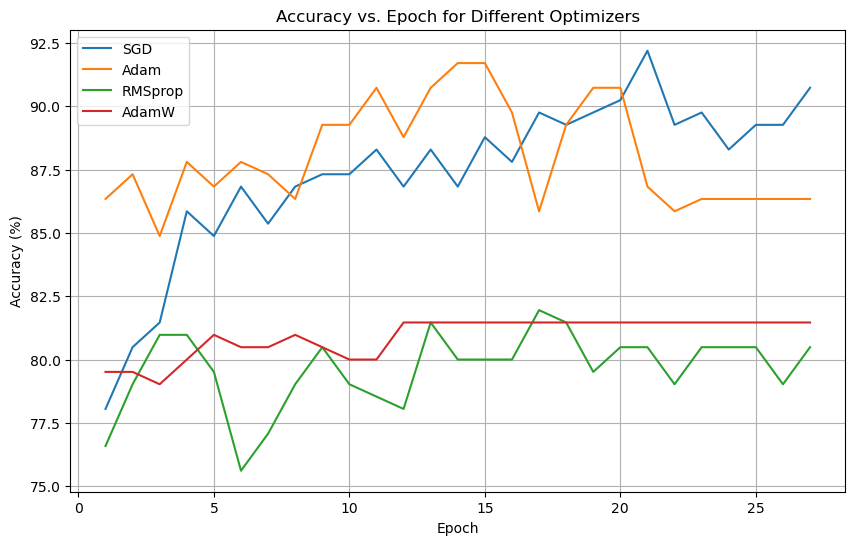

In [19]:
# Accuracy Plot
plt.figure(figsize=(10, 6))
for optimizer_name, accuracy_list in accuracies.items():
    plt.plot(range(1, len(accuracy_list) + 1), accuracy_list, label=optimizer_name)

plt.title('Accuracy vs. Epoch for Different Optimizers')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()

